In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
# cols = ['typeofaction', 'sourceid', 'destinationid', 'amountofmoney', 'date', 'isfraud', 'typeoffraud']
df = pd.read_csv('banktransaction.csv', header=0)
cols = df.columns

In [3]:
df.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1


In [4]:
df.columns

Index(['typeofaction', 'sourceid', 'destinationid', 'amountofmoney', 'date',
       'isfraud', 'typeoffraud'],
      dtype='object')

In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   typeofaction   2340 non-null   object
 1   sourceid       2340 non-null   int64 
 2   destinationid  2340 non-null   int64 
 3   amountofmoney  2340 non-null   int64 
 4   date           2340 non-null   object
 5   isfraud        2340 non-null   int64 
 6   typeoffraud    2340 non-null   object
dtypes: int64(4), object(3)
memory usage: 128.1+ KB


typeofaction     0
sourceid         0
destinationid    0
amountofmoney    0
date             0
isfraud          0
typeoffraud      0
dtype: int64

In [6]:
df.shape


(2340, 7)

In [7]:
df['typeofaction'].unique()

array(['cash-in', 'transfer'], dtype=object)

In [8]:
type_of_action = df['typeofaction'].value_counts()

In [9]:
transaction = type_of_action.index

In [10]:
quantity = type_of_action.values

In [11]:
import plotly.express as px

In [12]:
px.pie(df,values=quantity,names=transaction, hole=0.4, title='Type of transaction')

In [13]:
# df = df.dropna()

In [14]:
df

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1
...,...,...,...,...,...,...,...
2335,transfer,14945,43793,106907,2019-03-29 14:53:00,0,none
2336,transfer,9532,43793,106907,2019-04-13 13:19:00,0,none
2337,transfer,27332,43793,106907,2019-05-10 09:34:00,0,none
2338,transfer,32685,43793,106907,2019-07-08 12:20:00,0,none


1399
2340


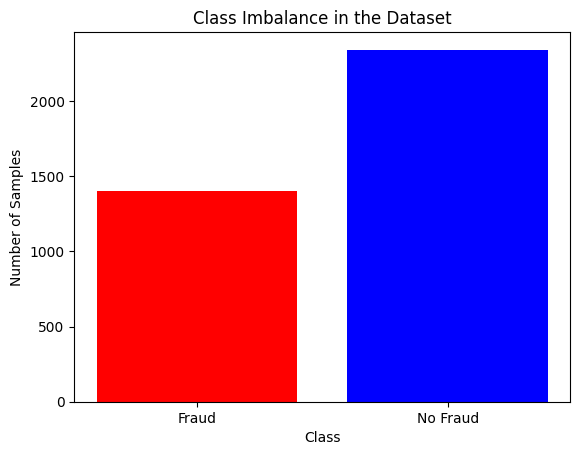

In [15]:
fraud_count = (df['isfraud'] == 1).sum()
no_fraud_count = len(df['isfraud']== 0)

print(fraud_count)
print(no_fraud_count)

# Create a bar plot to display the class imbalance
plt.bar(['Fraud', 'No Fraud'], [fraud_count, no_fraud_count], color=['red', 'blue'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Imbalance in the Dataset')
plt.show()


In [16]:
type_of_action

typeofaction
transfer    1580
cash-in      760
Name: count, dtype: int64

In [17]:
# replace trasnfer and cash-in values with numbers
df.replace(to_replace=['transfer', 'cash-in'],value=[1,2],inplace=True)

In [18]:
df

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,2,30105,28942,494528,2019-07-19 14:40:00,1,type1
1,2,30105,8692,494528,2019-05-17 14:57:00,1,type1
2,2,30105,60094,494528,2019-07-20 13:20:00,1,type1
3,2,30105,20575,494528,2019-07-03 14:15:00,1,type1
4,2,30105,45938,494528,2019-05-26 10:40:00,1,type1
...,...,...,...,...,...,...,...
2335,1,14945,43793,106907,2019-03-29 14:53:00,0,none
2336,1,9532,43793,106907,2019-04-13 13:19:00,0,none
2337,1,27332,43793,106907,2019-05-10 09:34:00,0,none
2338,1,32685,43793,106907,2019-07-08 12:20:00,0,none


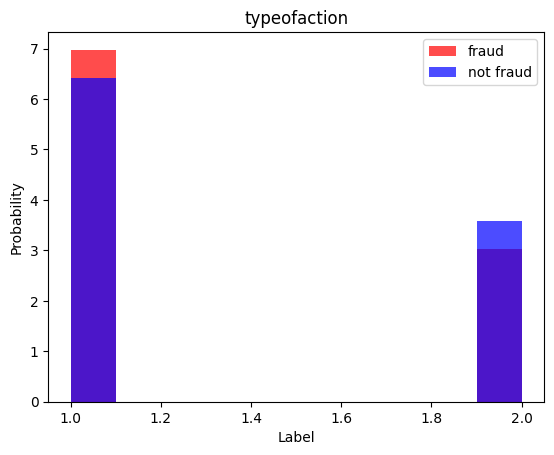

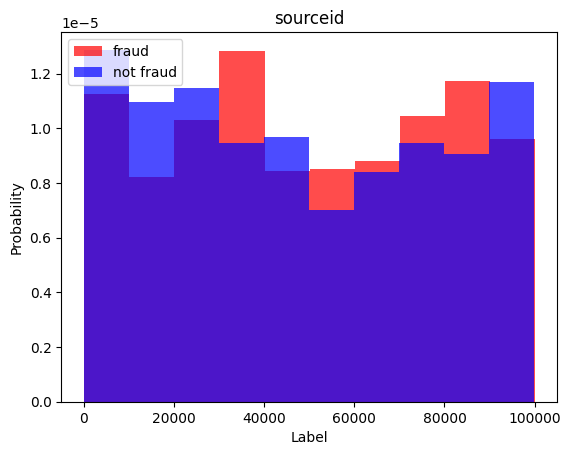

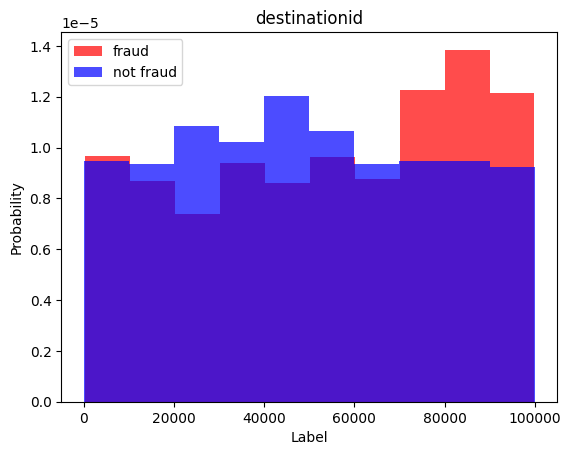

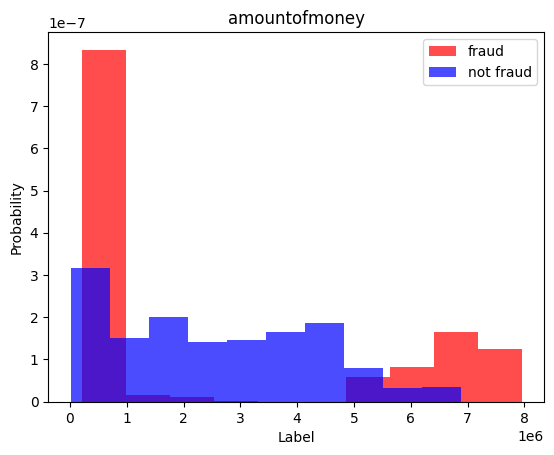

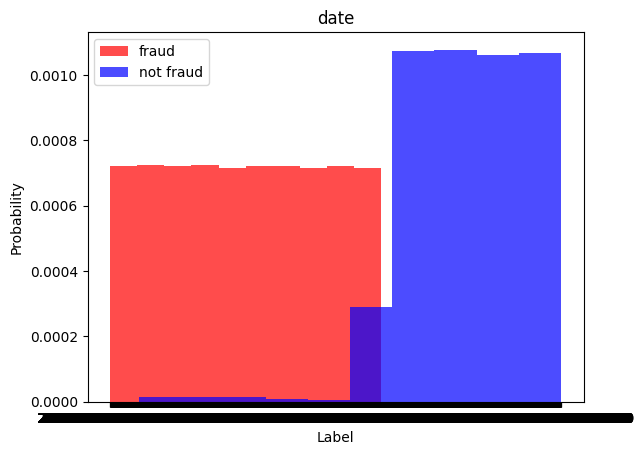

In [19]:
for label in cols[:-2]:
  plt.hist(df[df['isfraud']==1][label], color='red', label='fraud', alpha=0.7, density=True)
  plt.hist(df[df['isfraud']==0][label], color='blue', label='not fraud', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel('Label')
  plt.legend()
  plt.show()

In [20]:
# convert date into pandas datetime object
df['date'] = pd.to_datetime(df['date'])
# df['date_as_int'] = df['date'].dt.strftime('%Y%m%d').astype(int)
df['date'] = df['date'].dt.strftime('%Y%m%d').astype(int)
df['isfraud']=df['isfraud'].map({0:'no fraud', 1:'fraud'})
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])


In [21]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-2]].values
  y = dataframe[dataframe.columns[-2]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  data =  np.hstack((x, np.reshape(y, (-1, 1))))


  return data, x, y

In [22]:
# if the difference is too big, whe need to take more of the less class to increase the size of the dataset
print(len(train[train['isfraud']=='fraud']))
print(len(train[train['isfraud']=='no fraud']))

847
557


In [23]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [25]:
y_pred = classifier.predict(x_test)

In [26]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       fraud       0.83      0.84      0.83       290
    no fraud       0.73      0.71      0.72       178

    accuracy                           0.79       468
   macro avg       0.78      0.78      0.78       468
weighted avg       0.79      0.79      0.79       468

[[243  47]
 [ 51 127]]


In [27]:
n = list(range(1,30))
accuracy = []
for i in n:
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)
    

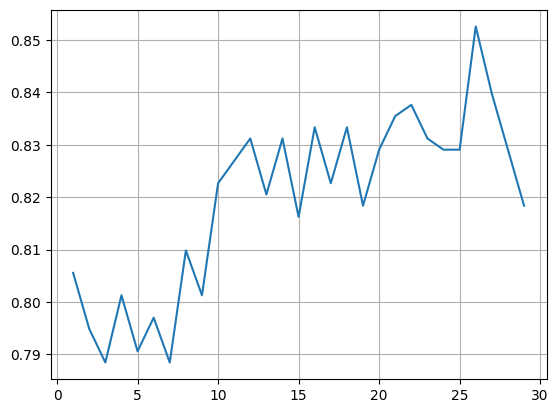

In [28]:
plt.plot(n, accuracy)
plt.grid(True)

In [29]:
classifier_best = KNeighborsClassifier(n_neighbors=accuracy.index(max(accuracy))+1)
classifier_best.fit(x_train,y_train)
y_pred = classifier_best.predict(x_test)

In [30]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}, neighbours: {accuracy.index(max(accuracy))+1}')

Accuracy: 0.8525641025641025, neighbours: 26


In [31]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       fraud       0.84      0.94      0.89       290
    no fraud       0.88      0.71      0.79       178

    accuracy                           0.85       468
   macro avg       0.86      0.82      0.84       468
weighted avg       0.86      0.85      0.85       468

[[273  17]
 [ 52 126]]


In [32]:
import seaborn as sns

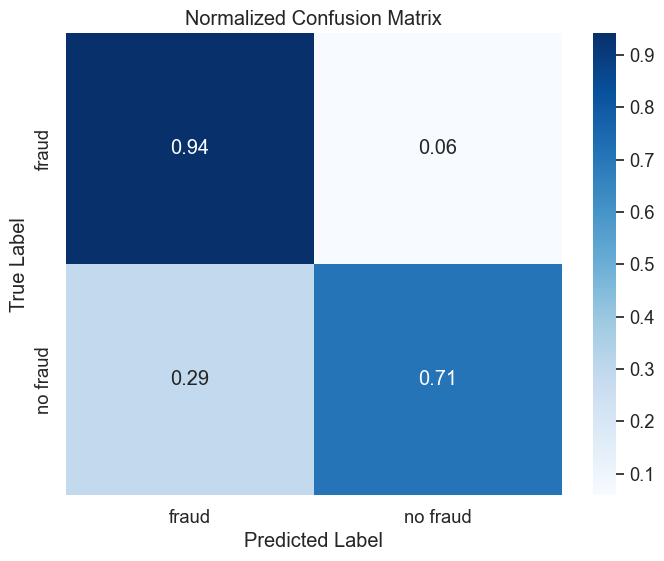

In [33]:
def plot_normalized_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Normalized Confusion Matrix')
    plt.grid(True)
    plt.show()

plot_normalized_confusion_matrix(y_test, y_pred, classes=["fraud", "no fraud"])